<a href="https://colab.research.google.com/github/Mano2610/Digital-Document-Threat-Intelligence/blob/main/Project_Glasswall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
df = pd.read_csv('gdrive/My Drive/Data/task_data.csv')

In [101]:
categoricals = []
for col, col_type in df.dtypes.iteritems():
     if col_type == 'O':
          categoricals.append(col)
     else:
          df[col].fillna(0, inplace=True)

In [102]:
df_ohe = pd.get_dummies(df, columns=categoricals, dummy_na=True)

In [103]:
df_ohe.head()

,malicious,issue_368,issue_69,issue_74,issue_75,issue_76,issue_77,issue_78,issue_79,issue_80,issue_81,issue_82,issue_83,issue_84,issue_85,issue_86,issue_87,issue_88,issue_89,issue_90,issue_91,issue_92,issue_93,issue_98,issue_109,issue_119,issue_130,issue_141,issue_151,issue_161,issue_164,issue_165,issue_166,issue_167,issue_168,issue_169,issue_170,issue_171,issue_172,issue_173,...,issue_208,issue_209,issue_210,issue_211,issue_212,issue_213,issue_214,issue_215,issue_216,issue_217,issue_218,issue_219,issue_220,issue_221,issue_222,issue_223,issue_234,issue_235,content_2,content_3,content_4,content_5,content_6,content_8,content_9,content_11,content_0,content_1,content_7,content_10,fileType_doc,fileType_docx,fileType_gif,fileType_jpeg,fileType_pdf,fileType_ppt,fileType_pptx,fileType_xls,fileType_xlsx,fileType_nan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,3,10,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,35,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,9,0,0,0,0,0,1,0,0,0,0


In [104]:
df.query('malicious == "0"')['malicious'].agg(['nunique','count','size'])

nunique       1
count      5267
size       5267
Name: malicious, dtype: int64

In [105]:
df.query('malicious == "1"')['malicious'].agg(['nunique','count','size'])

nunique       1
count      6563
size       6563
Name: malicious, dtype: int64

<function matplotlib.pyplot.show>

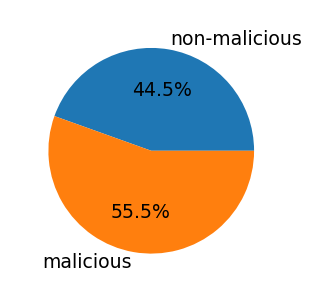

In [106]:
data=df.malicious.value_counts(sort=0)
labels = 'non-malicious', 'malicious'
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

In [107]:
df.fileType = pd.Categorical(df.fileType).codes

In [108]:
df.isna()

,fileType,malicious,issue_368,issue_69,issue_74,issue_75,issue_76,issue_77,issue_78,issue_79,issue_80,issue_81,issue_82,issue_83,issue_84,issue_85,issue_86,issue_87,issue_88,issue_89,issue_90,issue_91,issue_92,issue_93,issue_98,issue_109,issue_119,issue_130,issue_141,issue_151,issue_161,issue_164,issue_165,issue_166,issue_167,issue_168,issue_169,issue_170,issue_171,issue_172,...,issue_198,issue_199,issue_200,issue_201,issue_202,issue_203,issue_204,issue_205,issue_206,issue_207,issue_208,issue_209,issue_210,issue_211,issue_212,issue_213,issue_214,issue_215,issue_216,issue_217,issue_218,issue_219,issue_220,issue_221,issue_222,issue_223,issue_234,issue_235,content_2,content_3,content_4,content_5,content_6,content_8,content_9,content_11,content_0,content_1,content_7,content_10
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [109]:
df.dropna()

,fileType,malicious,issue_368,issue_69,issue_74,issue_75,issue_76,issue_77,issue_78,issue_79,issue_80,issue_81,issue_82,issue_83,issue_84,issue_85,issue_86,issue_87,issue_88,issue_89,issue_90,issue_91,issue_92,issue_93,issue_98,issue_109,issue_119,issue_130,issue_141,issue_151,issue_161,issue_164,issue_165,issue_166,issue_167,issue_168,issue_169,issue_170,issue_171,issue_172,...,issue_198,issue_199,issue_200,issue_201,issue_202,issue_203,issue_204,issue_205,issue_206,issue_207,issue_208,issue_209,issue_210,issue_211,issue_212,issue_213,issue_214,issue_215,issue_216,issue_217,issue_218,issue_219,issue_220,issue_221,issue_222,issue_223,issue_234,issue_235,content_2,content_3,content_4,content_5,content_6,content_8,content_9,content_11,content_0,content_1,content_7,content_10
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1
1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,3,10,0,0,0,0,1
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,35
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11826,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
11827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0
11828,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
x = df.drop('malicious', axis=1)
y = df.malicious

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=27, shuffle=True)
#X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2,random_state=27, shuffle=True)

In [112]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform validation data
#X_val_norm = norm.transform(X_val)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

#**Decision Tree :**

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import tree

for i in range(100):
  clf1 = tree.DecisionTreeClassifier()
  clf1.fit(X_train, y_train)
  cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
  a = cross_val_score(clf1, X_train, y_train, cv=cv)

In [114]:
np.mean(a)

0.9305335446381405

In [115]:
y_pred = clf1.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix(y_test,y_pred)

array([[ 923,   66],
       [  94, 1283]])

In [117]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.93      0.92       989\n           1       0.95      0.93      0.94      1377\n\n    accuracy                           0.93      2366\n   macro avg       0.93      0.93      0.93      2366\nweighted avg       0.93      0.93      0.93      2366\n'

In [118]:
accuracy_score(y_test,y_pred)*100

93.23753169907016

In [119]:
clf1.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.96296296, 0.03703704],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [120]:
from sklearn.externals import joblib
joblib.dump(clf1, 'model.pkl')

['model.pkl']

In [121]:
ck = joblib.load('model.pkl')

In [124]:
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")

Models columns dumped!


#**Logistic Regression :**

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(clf, X_train, y_train, cv=cv)

array([0.87788779, 0.85214521, 0.82772277, 0.84884488, 0.82838284])

In [31]:
clf.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [32]:
clf.score(X_test, y_test)

0.8647506339814032

In [33]:
clf.predict_proba(X_test)

array([[0.52960097, 0.47039903],
       [0.51492659, 0.48507341],
       [0.40054156, 0.59945844],
       ...,
       [0.12673204, 0.87326796],
       [0.35628339, 0.64371661],
       [0.01588094, 0.98411906]])

#**SVM :**

In [34]:
from sklearn import svm

clf2 = svm.SVC()
clf2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
clf2.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
clf2.score(X_test, y_test)

0.6263736263736264

#**GaussianNB :**

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
gnb.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
gnb.score(X_test, y_test)

0.6610312764158918

#**KNN :**

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

In [41]:
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [42]:
print(nca_pipe.score(X_test, y_test))

0.9192730346576501
